 # Imports

In [2]:
# 📘 Credit Scoring Model (CodeAlpha Internship Project)
# Complete Notebook with EDA, Modeling, and Output Plots

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

<h3>Load Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

In [3]:
# Paths
train_path = 'train.csv'
test_path = 'test.csv'
plot_dir = 'plots/'
os.makedirs(plot_dir, exist_ok=True)

# Load Data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


C:\Users\Zain\AppData\Local\Temp\ipykernel_12484\1639480617.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path)


# Exploratory Data Analysis

In [4]:
# Combine for EDA
train_df['Source'] = 'Train'
test_df['Source'] = 'Test'
data = pd.concat([train_df, test_df])

In [5]:
data.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Source
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,Train
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,Train
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,Train
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,Train
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,Train
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,Train
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,Train
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,Train
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,Train
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,Train


# Overview of Data

In [6]:
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Missing values:\n", data.isnull().sum())

Shape: (150000, 29)
Columns: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Source']
Missing values:
 ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                

### Drop Null Values

In [7]:
data.dropna(inplace=True)

# Univariate Analysis

In [11]:
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"{plot_dir}{col}_distribution.png")
    plt.close()

# Bivariate Analysis

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=train_df,color='purple')
plt.title("Outstanding Debt by Credit Score")
plt.savefig(f"{plot_dir}outstanding_debt_vs_credit_score.png")
plt.show()
plt.close()

# Correlation

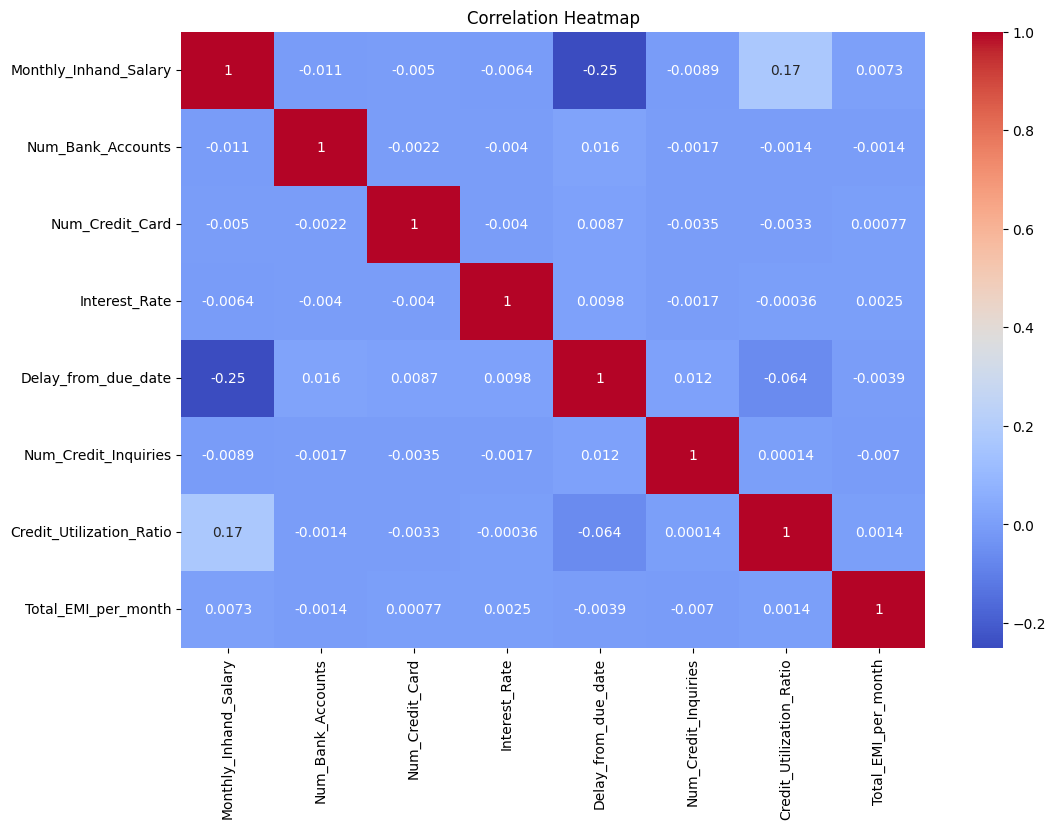

In [8]:
corr = train_df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig(f"{plot_dir}correlation_heatmap.png")
plt.show()
plt.close()


# Preprocessing

In [9]:
X = train_df.drop(['Credit_Score'], axis=1)
y = train_df['Credit_Score']

# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# ***Encode*** ***categoricals***

In [10]:
for col in X.select_dtypes(include='object').columns:
    if col not in ['Credit_History_Age']: # Exclude Credit_History_Age from standard label encoding for now
        le = LabelEncoder()
        # Combine train and test data for fitting the encoder
        combined_series = pd.concat([X[col].astype(str), test_df[col].astype(str)], axis=0).astype(str).unique()
        le.fit(combined_series)

        # Transform train and test data separately
        X[col] = le.transform(X[col].astype(str))
        test_df[col] = le.transform(test_df[col].astype(str))

# Clean and convert 'Amount_invested_monthly' and 'Monthly_Balance' to numeric
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    # Convert to string and remove non-numeric characters except decimal point
    X[col] = X[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    test_df[col] = test_df[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    X[col] = pd.to_numeric(X[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Process 'Credit_History_Age'
def parse_credit_history_age(age_str):
    if pd.isna(age_str) or str(age_str).lower() == 'nan': # Convert to string for comparison
        return np.nan
    # Ensure input is treated as string
    age_str = str(age_str)
    parts = age_str.replace(' Years and ', ' ').replace(' Months', '').split()
    try:
        years = int(parts[0]) if len(parts) > 0 else 0
        months = int(parts[1]) if len(parts) > 1 else 0
        return years * 12 + months
    except (ValueError, IndexError):
        return np.nan

X['Credit_History_Age'] = X['Credit_History_Age'].apply(parse_credit_history_age)
test_df['Credit_History_Age'] = test_df['Credit_History_Age'].apply(parse_credit_history_age)

# Explicitly convert Credit_History_Age to float before imputation to handle NaNs correctly
X['Credit_History_Age'] = X['Credit_History_Age'].astype(float)
test_df['Credit_History_Age'] = test_df['Credit_History_Age'].astype(float)


# Impute missing values (including those created by coercion and parsing)
for col in X.columns:
    if X[col].isnull().any():
        # Impute with the mean for numeric columns
        if X[col].dtype in ['int64', 'float64']:
            mean_val = X[col].mean()
            X[col].fillna(mean_val, inplace=True)
            # Use the mean from the training data to impute missing values in the test data
            test_df[col].fillna(mean_val, inplace=True)
        # Impute with the mode for object columns
        elif X[col].dtype == 'object':
             mode_val = X[col].mode()[0]
             X[col].fillna(mode_val, inplace=True)
             test_df[col].fillna(mode_val, inplace=True)

# Drop 'ID', 'Customer_ID', and 'Source' columns from X
X = X.drop(['ID', 'Customer_ID', 'Source'], axis=1, errors='ignore') # Added 'errors=ignore' for robustness


# At this point, 'ID' and 'Customer_ID' are expected to be dropped already or not present in X and test_df
test_X = test_df.copy()

# Assert no NaNs remain in X and test_X after imputation
if X.isnull().sum().sum() > 0:
    print("Warning: NaNs still present in X after imputation:", X.isnull().sum()[X.isnull().sum() > 0])
if test_X.isnull().sum().sum() > 0:
    print("Warning: NaNs still present in test_X after imputation:", test_X.isnull().sum()[test_X.isnull().sum() > 0])

C:\Users\Zain\AppData\Local\Temp\ipykernel_12484\2769214688.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_val, inplace=True)
C:\Users\Zain\AppData\Local\Temp\ipykernel_12484\2769214688.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

# --- 🔧 Feature Engineering: Derived Columns ---


In [11]:


# 1. Credit per bank account
X['Credit_Per_Account'] = X['Outstanding_Debt'] / X['Num_Bank_Accounts'].replace(0, np.nan)
test_X['Credit_Per_Account'] = test_X['Outstanding_Debt'] / test_X['Num_Bank_Accounts'].replace(0, np.nan)

# 2. Loan burden (how much of salary goes into EMIs)
X['Loan_Burden'] = X['Total_EMI_per_month'] / X['Monthly_Inhand_Salary'].replace(0, np.nan)
test_X['Loan_Burden'] = test_X['Total_EMI_per_month'] / test_X['Monthly_Inhand_Salary'].replace(0, np.nan)

# 3. Investment to salary ratio
X['Investment_Ratio'] = X['Amount_invested_monthly'] / X['Monthly_Inhand_Salary'].replace(0, np.nan)
test_X['Investment_Ratio'] = test_X['Amount_invested_monthly'] / test_X['Monthly_Inhand_Salary'].replace(0, np.nan)

# 4. Delayed payments to number of loans ratio
X['Delayed_Payment_Ratio'] = X['Num_of_Delayed_Payment'] / X['Num_of_Loan'].replace(0, np.nan)
test_X['Delayed_Payment_Ratio'] = test_X['Num_of_Delayed_Payment'] / test_X['Num_of_Loan'].replace(0, np.nan)

# 5. Average delay duration
X['Avg_Payment_Delay'] = X['Delay_from_due_date'] / X['Num_of_Delayed_Payment'].replace(0, np.nan)
test_X['Avg_Payment_Delay'] = test_X['Delay_from_due_date'] / test_X['Num_of_Delayed_Payment'].replace(0, np.nan)

# 6. EMI to income ratio
X['EMI_to_Income_Ratio'] = X['Total_EMI_per_month'] / X['Annual_Income'].replace(0, np.nan)
test_X['EMI_to_Income_Ratio'] = test_X['Total_EMI_per_month'] / test_X['Annual_Income'].replace(0, np.nan)

# 7. Credit saturation level
X['Credit_Saturation_Level'] = X['Credit_Utilization_Ratio'] * X['Num_Credit_Card']
test_X['Credit_Saturation_Level'] = test_X['Credit_Utilization_Ratio'] * test_X['Num_Credit_Card']

# 8. Salary to debt ratio
X['Salary_to_Debt_Ratio'] = X['Monthly_Inhand_Salary'] / X['Outstanding_Debt'].replace(0, np.nan)
test_X['Salary_to_Debt_Ratio'] = test_X['Monthly_Inhand_Salary'] / test_X['Outstanding_Debt'].replace(0, np.nan)

# 9. Binary encoding of Payment_of_Min_Amount
X['Is_Min_Payment_Yes'] = (X['Payment_of_Min_Amount'] == 1).astype(int)
test_X['Is_Min_Payment_Yes'] = (test_X['Payment_of_Min_Amount'] == 1).astype(int)

# 10. Age-to-Credit-History ratio (assuming both in months)
X['Age_to_Credit_History'] = X['Age'] / X['Credit_History_Age'].replace(0, np.nan)
test_X['Age_to_Credit_History'] = test_X['Age'] / test_X['Credit_History_Age'].replace(0, np.nan)

# --- Impute any new NaNs generated ---
for col in X.columns:
    if X[col].isnull().any():
        mean_val = X[col].mean()
        X[col].fillna(mean_val, inplace=True)
        test_X[col].fillna(mean_val, inplace=True)


C:\Users\Zain\AppData\Local\Temp\ipykernel_12484\3230607112.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_val, inplace=True)
C:\Users\Zain\AppData\Local\Temp\ipykernel_12484\3230607112.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

# Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure test_X has the same columns as X before scaling
test_X = test_X[X.columns]
test_X_scaled = scaler.transform(test_X)

# Split training data into training and validation sets


In [13]:
# Use the encoded y for splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the training and validation features
scaler_split = StandardScaler()
X_train_scaled = scaler_split.fit_transform(X_train)
X_val_scaled = scaler_split.transform(X_val)

# Ensure test_X has the same columns as X_train before scaling
test_X = test_X.drop(['Customer_ID', 'ID', 'Source'], axis=1, errors='ignore') # Drop these columns from test_X
test_X_scaled = scaler_split.transform(test_X)

# Train Models

In [14]:
best_model = None
best_score = -1  # For weighted avg F1-score
best_model_name = ""

performance_data = []  # For performance CSV
os.makedirs('models', exist_ok=True)

def train_and_evaluate(model, name, X_train, y_train, X_val, y_val):
    global best_model, best_score, best_model_name

    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    print(f"\n{name} Classification Report on Validation Set:")
    report = classification_report(y_val, preds, output_dict=True)
    print(classification_report(y_val, preds))

    # Save metrics
    weighted_f1 = report['weighted avg']['f1-score']
    weighted_precision = report['weighted avg']['precision']
    weighted_recall = report['weighted avg']['recall']
    accuracy = report['accuracy']

    performance_data.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision (Weighted)': round(weighted_precision, 4),
        'Recall (Weighted)': round(weighted_recall, 4),
        'F1-Score (Weighted)': round(weighted_f1, 4)
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_val, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Validation Set)")
    plt.savefig(f"{plot_dir}{name}_confusion_matrix_validation.png")
    plt.close()

    # Save model
    joblib.dump(model, f"models/{name}.pkl")

    # Check for best model
    if weighted_f1 > best_score:
        best_score = weighted_f1
        best_model = model
        best_model_name = name
        joblib.dump(model, "models/best_model.pkl")

# --- Train All Models ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    train_and_evaluate(model, name, X_train_scaled, y_train, X_val_scaled, y_val)

# Save performance table
perf_df = pd.DataFrame(performance_data)
perf_df.to_csv('models/model_performance.csv', index=False)
print("✅ Model performance saved to models/model_performance.csv")




LogisticRegression Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44      3566
           1       0.62      0.42      0.50      5799
           2       0.61      0.77      0.68     10635

    accuracy                           0.60     20000
   macro avg       0.58      0.53      0.54     20000
weighted avg       0.60      0.60      0.59     20000


DecisionTree Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      3566
           1       0.63      0.64      0.64      5799
           2       0.71      0.71      0.71     10635

    accuracy                           0.67     20000
   macro avg       0.64      0.65      0.65     20000
weighted avg       0.67      0.67      0.67     20000


RandomForest Classification Report on Validation Set:
              precision    recall  f1-score   support

           0

# 🔍 Summary: Best Model

In [17]:

print("\n🔍 Summary of Best Model:")
if best_model:
    print(f"✅ Best Model: {best_model_name}")
    print(f"🎯 Best Weighted Avg F1-score on Validation Set: {best_score:.4f}")
else:
    print("⚠️ No model was marked as best. Check if evaluation metric was calculated properly.")


🔍 Summary of Best Model:
✅ Best Model: RandomForest
🎯 Best Weighted Avg F1-score on Validation Set: 0.7783
